In [1]:
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceMatrix, DistanceTreeConstructor
from keyname import keyname as kn
from matplotlib import colors as mpl_colors
from teeplot import teeplot as tp

import Bio
import csv
import glob
import itertools
import json
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import networkx as nx
import numpy as np
import pandas as pd
import scipy as sci
import seaborn as sns
import urllib.request as request

from pathlib import Path

### define pyplot parameters

In [2]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams["figure.figsize"] = (15, 20)
plt.rcParams["font.size"] = 13
plt.rcParams["font.weight"] = "bold"
plt.rcParams['font.family'] = 'Roboto'
plt.rcParams["lines.linewidth"] = 2
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.edgecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'

# get data

In [3]:
filenames = glob.glob("dump/stint=*/*/a=genome+criteria=abundance+*thread=0*.json")

# preprocess data

In [4]:
stint_tags = {}
for filename in filenames:
    file_data = kn.unpack(filename)
    with open(filename, 'r') as file:
        data = json.load(file)
        data = data['value0']['event_tags']['tags']
        tags = [v['value0']['value0'] for k, v in data.items()]
        stint_tags[file_data['stint']] = tags
stint_tags = {int(k): v for k, v in stint_tags.items()}
stint_tags = dict(sorted(stint_tags.items()))
del stint_tags[101]
del stint_tags[102]

# generate distance matrix

## we're using hamming distance

In [5]:
def hamming_distance(a, b):
    return (a ^ b).bit_count()

## calculate all pairwise distances and store them in the matrix

In [6]:
matrix = np.zeros((len(stint_tags), len(stint_tags)))
pairwise = itertools.combinations(list(stint_tags.keys()), 2)

for a, b in pairwise:
    matrix[a][b] = sum(hamming_distance(x, y) for x, y in zip(stint_tags[a], stint_tags[b]))

## graph distance matrix

teeplots/distance_matrix/cmap=blues+linecolor=88888820+viz=heatmap+ext=.pdf
teeplots/distance_matrix/cmap=blues+linecolor=88888820+viz=heatmap+ext=.png


<AxesSubplot:>

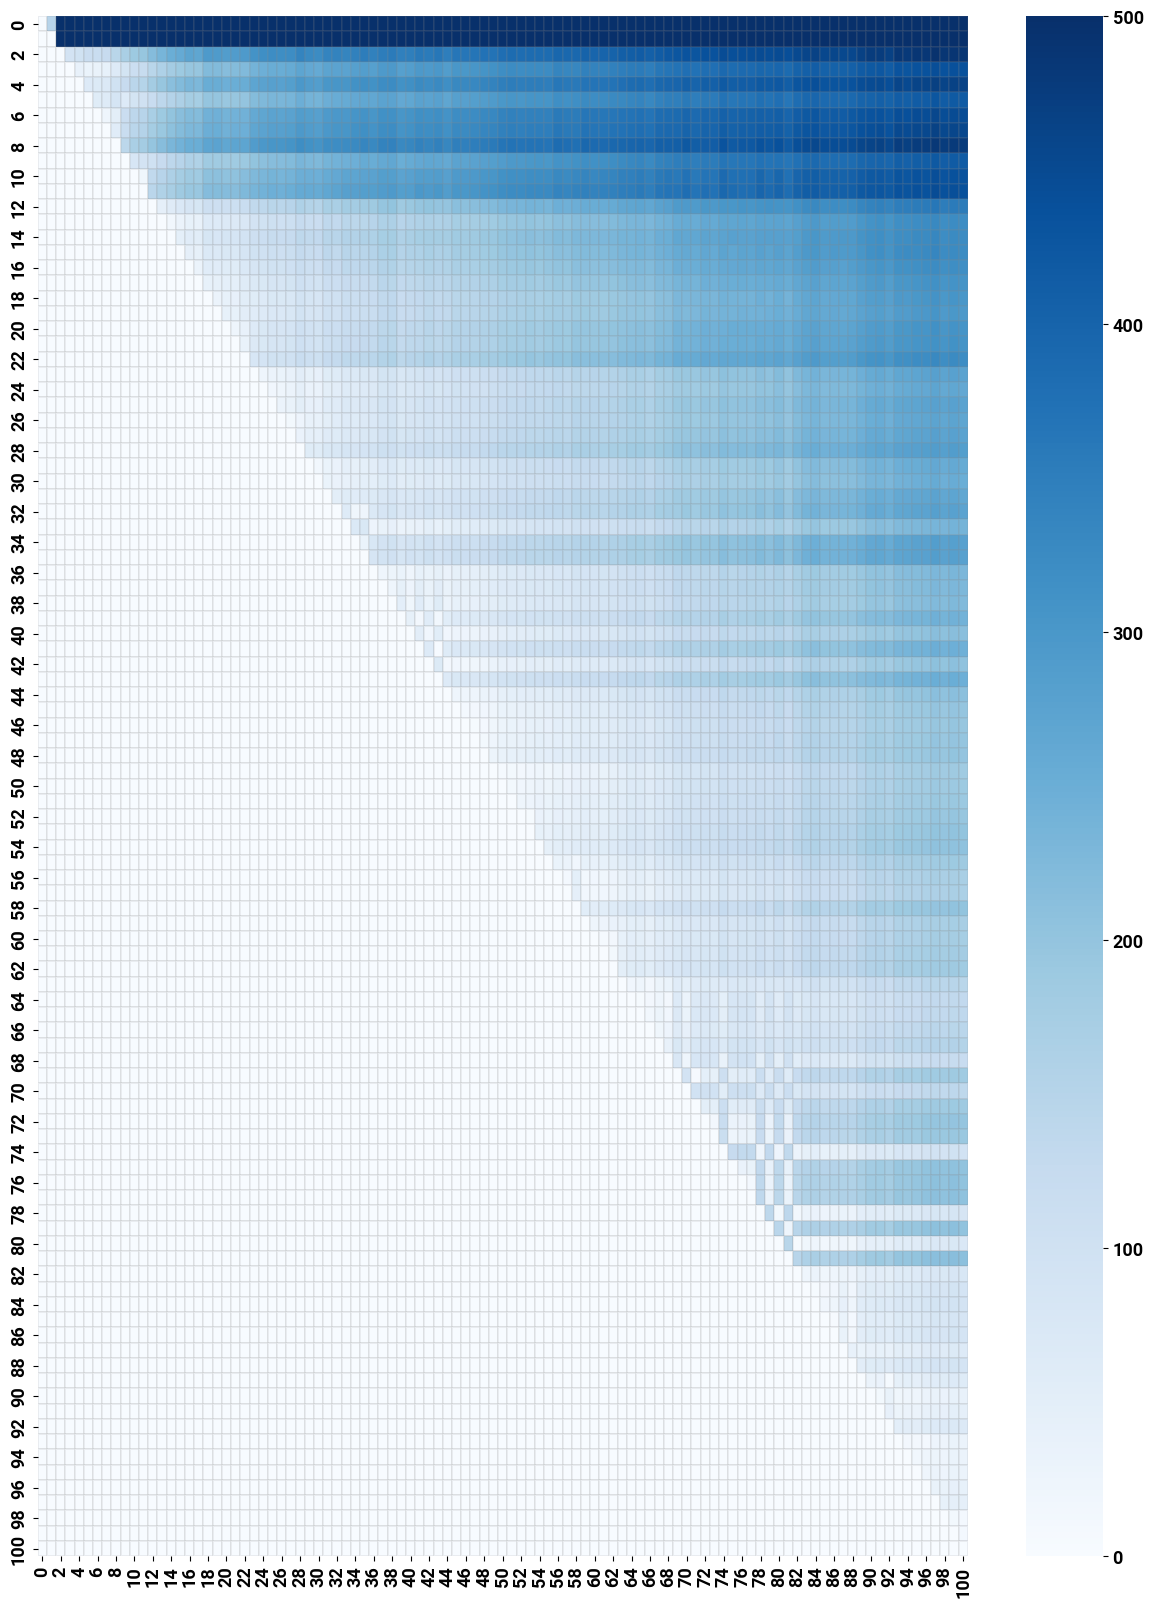

In [7]:
tp.tee(
    sns.heatmap,
    matrix,
    vmax=500,
    linewidths=0.05,
    linecolor='#88888820',
    cmap='Blues',
    teeplot_subdir="distance_matrix"
)

# store distance matrix for further use

In [9]:
# make dir if it doesn't already exist
Path("data/").mkdir(exist_ok=True)
# save array
np.save("data/distance_matrix.npy", matrix)